In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Since we are working with image data , thus we are using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Datasets link
https://lhncbc.nlm.nih.gov/publication/pub9932

In [ ]:
# Here we are cloning from github
# because size of data is 337 
# To download and upload it to drive it needs about 800MB
# So we are cloning from github
! git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 37.92 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [ ]:
# Now in file section you can see malaria-dataset folder
# where uninfected and parasitized(infected) malaria cell are given


In [ ]:
# Defining height and width for image to process in
image_width = 64
image_height = 64

# According to the availability of resource you can also increase
# image size

In [ ]:
# We are rescaling image matrix elements from 0 to 1 using ImageDataGenerator

# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',                           
                    target_size =(image_width,image_height),
                    class_mode='binary',
                    batch_size = 16,
                    subset = 'training')

Found 22048 images belonging to 2 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                        target_size= (image_width,image_height),
                                                        class_mode = 'binary',
                                                        batch_size = 16,
                                                        subset = 'validation')

Found 5510 images belonging to 2 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

###**Model Building using CNN**

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',padding='same',input_shape= (image_width,image_height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding = 'same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [ ]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
len(train_data_generator),len(validation_data_generator)
# Total training data i.e train_data_generator = batch_size * steps_per_epoch

(1378, 345)

In [ ]:
# We are using fit_generator() method because we obtained data using
# ImageDataGenerator()
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 10,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1378/1378 [==============================] - 111s 81ms/step - loss: 0.4747 - accuracy: 0.7682 - val_loss: 0.2240 - val_accuracy: 0.9241
Epoch 2/10
1378/1378 [==============================] - 110s 80ms/step - loss: 0.2218 - accuracy: 0.9275 - val_loss: 0.1967 - val_accuracy: 0.9354
Epoch 3/10
1378/1378 [==============================] - 109s 79ms/step - loss: 0.1960 - accuracy: 0.9425 - val_loss: 0.1740 - val_accuracy: 0.9368
Epoch 4/10
1378/1378 [==============================] - 109s 79ms/step - loss: 0.1655 - accuracy: 0.9498 - val_loss: 0.1582 - val_accuracy: 0.9443
Epoch 5/10
1378/1378 [==============================] - 110s 80ms/step - loss: 0.1544 - accuracy: 0.9529 - val_loss: 0.1906 - val_accuracy: 0.9316
Epoch 6/10
1378/1378 [==============================] - 114s 83ms/step - loss: 0.1449 - accuracy: 0.9550 - val_loss: 0.1635 - val_accuracy: 0.9463
Epoch 7/10
1378/1378 [====================

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

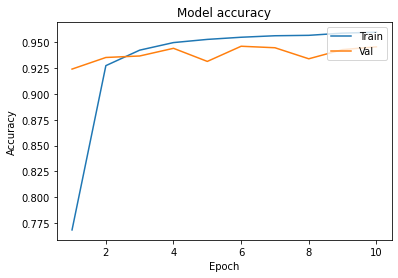

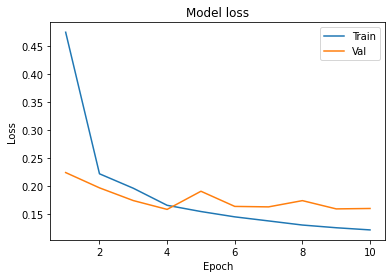

In [ ]:
plot_learningCurve(history,10)